In [ ]:
# https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import pandas as pd
print(keras.__version__)

2.6.0


In [ ]:
#Keras library for CIFAR dataset
from keras.datasets import cifar10
(X_train, y_train),(X_test, y_test)=cifar10.load_data()

#Train-validation-test split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.3)

#Dimension of the CIFAR10 dataset
print((X_train.shape, y_train.shape))
print((X_val.shape, y_val.shape))
print((X_test.shape, y_test.shape))


170508288/170498071 [==============================] - 2s 0us/step
((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [ ]:
import matplotlib.pyplot as plt
# display 14 random images from the training set
np.random.seed(42)

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

rand_14 = np.random.randint(0, X_train.shape[0],14)
sample_images = X_train[rand_14]
sample_labels = y_train[rand_14].astype(int)
sample_labels = sample_labels.reshape(-1,)

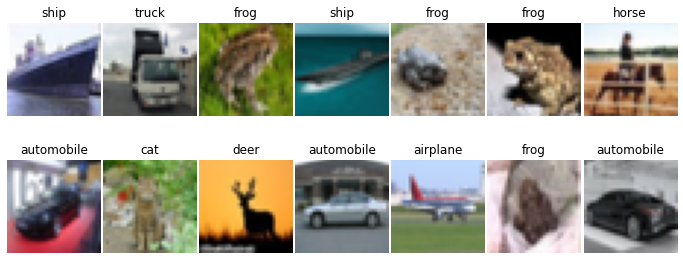

In [ ]:
# code to view the images
num_rows, num_cols = 2, 7
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_images[image_index], cmap='gray')
        ax[r,c].set_title(cifar_classes[sample_labels[image_index]])
plt.show()
plt.close()

In [ ]:
#Onehot Encoding the labels.
from sklearn.utils.multiclass import unique_labels
from tensorflow.keras.utils import to_categorical

#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

#Verifying the dimension after one hot encoding
print((X_train.shape, y_train.shape))
print((X_val.shape, y_val.shape))
print((X_test.shape, y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator()
val_generator = ImageDataGenerator()
test_generator = ImageDataGenerator()

In [ ]:
#Image Data Augmentation
#
#from keras.preprocessing.image import ImageDataGenerator

#train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1 )
#val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)
#test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True,zoom_range=.1)

In [ ]:
#Fitting the augmentation defined above to the data
train_generator.fit(X_train)
val_generator.fit(X_val)
test_generator.fit(X_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         7

In [ ]:
#Defining the parameters
batch_size= 10
epochs=3

In [ ]:
history = model.fit(train_generator.flow(X_train, y_train, batch_size=batch_size), validation_data=val_generator.flow(X_val, y_val), epochs = epochs)

Epoch 1/3
3500/3500 [==============================] - 66s 10ms/step - loss: nan - accuracy: 0.0973 - val_loss: nan - val_accuracy: 0.1067
Epoch 2/3
3500/3500 [==============================] - 35s 10ms/step - loss: nan - accuracy: 0.0971 - val_loss: nan - val_accuracy: 0.1067
Epoch 3/3
3500/3500 [==============================] - 36s 10ms/step - loss: nan - accuracy: 0.0971 - val_loss: nan - val_accuracy: 0.1067


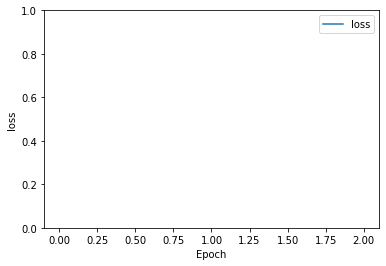

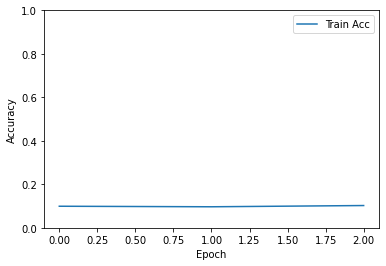

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'],
           label='loss')
    #plt.plot(hist['epoch'], hist['val_loss'],
    #       label = 'Val loss')
    plt.ylim([0,1])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Acc')
    #plt.plot(hist['epoch'], hist['val_accuracy'],
    #       label = 'Val Acc')
    plt.ylim([0,1])
    plt.legend()
    plt.show()


plot_history(history)


In [ ]:
scores = model.evaluate(X_test, y_test)
print("Accuracy: {}".format(scores[1]))


313/313 [==============================] - 3s 8ms/step - loss: 2.3028 - accuracy: 0.1000
Accuracy: 0.10000000149011612


In [ ]:
predictions = model.predict(X_test)
print(predictions.shape)


(10000, 10)


In [ ]:
pred = np.argmax(predictions, axis=1)
pred.shape

(10000,)

In [ ]:
y_test = np.argmax(y_test, axis=1)
y_test.shape

(10000,)

### Ground Truth Labels

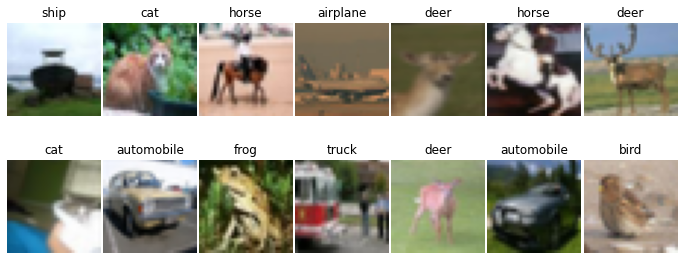

In [ ]:
# display 14 random images from the training set
rand_14 = np.random.randint(0, X_test.shape[0],14)
#rand_14 = range(14)
sample_digits = X_test[rand_14]
sample_labels = y_test[rand_14]
sample_labels = sample_labels.reshape(-1,)
# code to view the images
num_rows, num_cols = 2, 7
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_digits[image_index], cmap='gray')
        ax[r,c].set_title(cifar_classes[sample_labels[image_index]])
plt.show()
plt.close()

### Predicted Labels

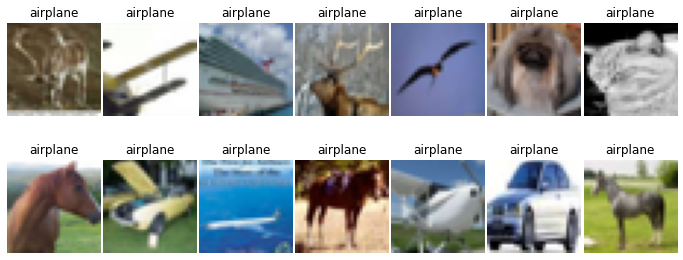

In [ ]:
# display 14 random images from the training set

#rand_14 = np.random.randint(0, X_test.shape[0],14)
#rand_14 = range(14)
sample_digits = X_test[rand_14]
sample_labels = pred[rand_14]
sample_labels = sample_labels.reshape(-1,)
# code to view the images
num_rows, num_cols = 2, 7
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_digits[image_index], cmap='gray')
        ax[r,c].set_title(cifar_classes[sample_labels[image_index]])
plt.show()
plt.close()